# Приоретизация данных и A/B-тест

### Описание проекта

Необходимо приоритизировать имеющиеся гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 110
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

### 1. Приоретизация гипотез

In [2]:
# Считываем данные
Hypothesis = pd.read_csv('/datasets/hypothesis.csv')
Hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Смотрим данные о таблице
Hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных массива Hypothesis полностью соответствуют смыслу данных. Пропусков нет. 

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета. Итоговый балл запишем в столбец 'ice'.

In [4]:
Hypothesis['ice'] = (Hypothesis['Impact'] * Hypothesis['Confidence'] / Hypothesis['Efforts']).round(1)
Hypothesis.sort_values(by='ice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета. Итоговый балл запишем в столбец 'rice'.

In [5]:
Hypothesis['rice'] = Hypothesis['Reach'] * Hypothesis['Impact'] * Hypothesis['Confidence'] / Hypothesis['Efforts']
Hypothesis.sort_values(by='rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Отнормируем знацения 'ice' и 'rice'. Разделим их на максимальное значение приоритета.

In [6]:
Hypothesis['ice_norm'] = Hypothesis['ice'] / Hypothesis['ice'].max()

Hypothesis['rice_norm'] = Hypothesis['rice'] / Hypothesis['rice'].max()

Hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice,ice_norm,rice_norm
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0,0.820988,0.357143
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0,0.123457,0.035714
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0,0.432099,0.500000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0,0.067901,0.080357
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0,0.061728,0.026786
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0,0.080247,0.035714
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0,0.493827,0.357143
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0,0.691358,1.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2,1.000000,0.144643


Выведем на график индексы гипотез по убыванию приоритета rice_norm.

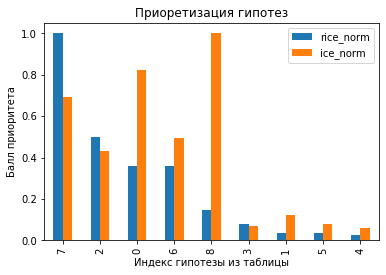

In [7]:
Hypothesis.sort_values(by='rice_norm', ascending = False)[['rice_norm', 'ice_norm']].plot.bar()
plt.title('Приоретизация гипотез')
plt.xlabel('Индекс гипотезы из таблицы')
plt.ylabel('Балл приоритета')
plt.show()

### 1. Вывод
Приоретизация ICE и RICE дает разный результат. Так тройки наиболее важных гипотез выглядят следующим образом:

ICE
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


RICE
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Такая разница в приоретизации имеющихся гипотез объясняется тем, что RICE в отличии от ICE учитывает бальный параметр Reach, который отражает количество пользователей, которых затронет изменение о котором говорится в гипотезе.

### 2. Анализ A/B-теста

### 2.1 Знакомимся с данными

Считаем и посмотрим данные о заказах.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.isna().mean()

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [11]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Проверим наличие дубликатов.

In [12]:
orders.duplicated().sum()

0

orders. Пропусков и дубликатов данных нет. Все типы данных соответствуют смыслу данных, кроме даты date, которая имеет тип object. Исправим это. 

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Посмотрим за какой период у нас данные

In [14]:
(orders['date'].min(), orders['date'].max())

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Посмотрим не попалили ли у нас одни и теже пользователи в разные группы

In [15]:
t = orders.groupby('visitorId').agg({'group': 'nunique'})
t

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


In [16]:
t['group'].max()

2

Посчитаем количество клиентов с задвоенной группой.

In [17]:
t[t['group'] !=1].count()

group    58
dtype: int64

Добавим в таблицу orders столбец group_count в котором укажем количество групп в которые попадал пользователь.

In [18]:
orders = orders.merge(t, on='visitorId', how='left', suffixes=['','_count'])
orders

,transactionId,visitorId,date,revenue,group,group_count
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,B,1
...,...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B,1
1193,2203539145,370388673,2019-08-14,3190,A,1
1194,1807773912,573423106,2019-08-14,10550,A,1
1195,1947021204,1614305549,2019-08-14,100,A,2


Удалим из orders клиентов попавшими в обе группы. 

In [19]:
orders = orders[orders['group_count'] == 1]
orders

,transactionId,visitorId,date,revenue,group,group_count
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,B,1
5,182168103,935554773,2019-08-15,2210,B,1
...,...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B,1
1192,2662137336,3733762160,2019-08-14,6490,B,1
1193,2203539145,370388673,2019-08-14,3190,A,1
1194,1807773912,573423106,2019-08-14,10550,A,1


После удаления из orders клиентов попавшими в обе группы в orders осталось 1016 строк из изначальных 1197.

Считаем и посмотрим данные о визитах.

In [20]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.isna().mean()

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [22]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Проверим наличие дубликатов.

In [23]:
visitors.duplicated().sum()

0

visitors. Пропусков  и дубликатов данных нет. Все типы данных соответствуют смыслу данных, кроме даты date, которая имеет тип object. Исправим это.

In [24]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Посмотрим за какой период у нас данные

In [25]:
(visitors['date'].min(), visitors['date'].max())

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Период данных в orders и visitors совпадают.

Теперь все данные в orders и visitors соответствуют их смыслу.

### 2.1 Выводы
* В visitors и orders пропусков и дубликатов данных нет. Все типы данных соответствуют смыслу данных, кроме даты date, которая имела тип object, но была переведена в datetime64[ns]
* Данные в visitors и orders предоставлены за период с 2019-08-01 по 2019-08-31.
* В orders были клиенты, которые попали в обе группы. После их удаления в orders осталось 1016 строк из изначальных 1197.


### 2.2 Анализ A/B-теста

Посчитаем коммулятивные метрики, которые понадабятся нам для строительства дальнейших графиков для оченки A/B-теста.

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'.

In [27]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                .sort_values(by=['date','group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Аналогично получим агрегированные кумулятивные по дням данные о посетителях

In [28]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                    .sort_values(by=['date','group'])

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы ordersAggregated и visitorsAggregated в одной с понятными названиями столбцов.

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### 2.2.1 Построим график кумулятивной выручки по группам по дням.

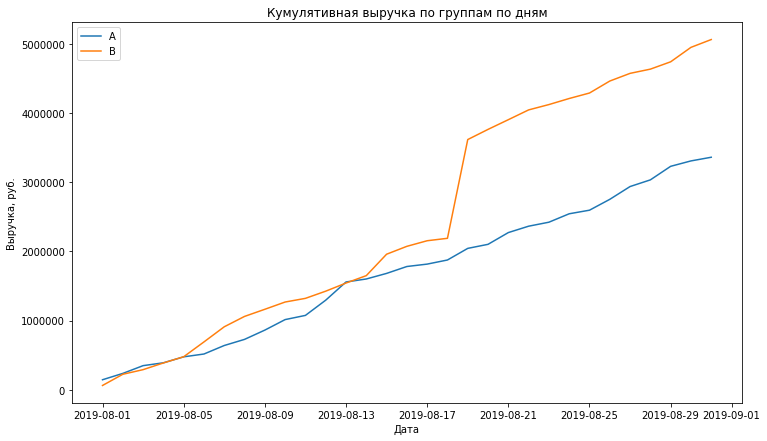

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.title('Кумулятивная выручка по группам по дням')

plt.legend() 

#### 2.2.1 Вывод
Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки обеих групп в нескольких точках имеют скачки, особенно выраженный скачок наблюдался в группе В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### 2.2.2 Построим график кумулятивного среднего чека по группам по дням.

Для этого разделим кумулятивную выручку на кумулятивное число заказов.

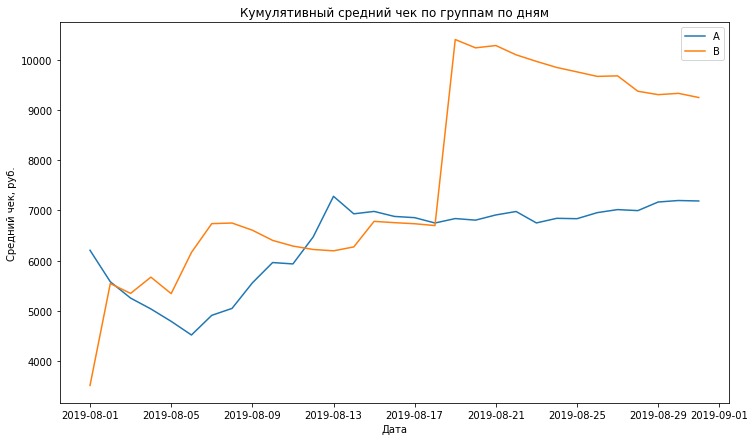

In [31]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по группам по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.legend() 

#### 2.2.2 Вывод
Средний чек тоже становится более равномерным ближе к концу теста: похоже, что он установился для группы В и продолжает падать для группы А. Возможно, в группу А в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### 2.2.3 Построим график относительного изменения по дням кумулятивного среднего чека группы B к группе A.

Собирем данные в одном датафрейме для обеих групп.

In [32]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left', 
                                                   suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Теперь построим график.

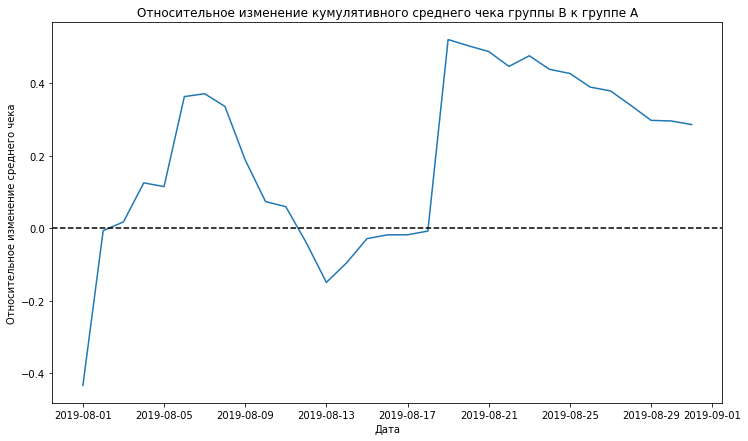

In [33]:
# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

#### 2.2.3 Вывод
График имеет довольно-таки сильные скачки. Видно, что показатель еще не устаканился. Скорее всего это связано с крупными заказами и выбросами. Несмотря на то, что к концу теста средний чек группы В на 30% выше чем в группе А, это может быть вызвано выбросами и крупными заказами и требует дополнительной проверки.

#### 2.2.4 Построим график кумулятивной конверсии по группам по дням

Добавим куммулятивную конверсию в cumulativeData и выделим данные для групп.

In [34]:
# Рассчитываем конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Теперь построим график.

(0, 0.05)

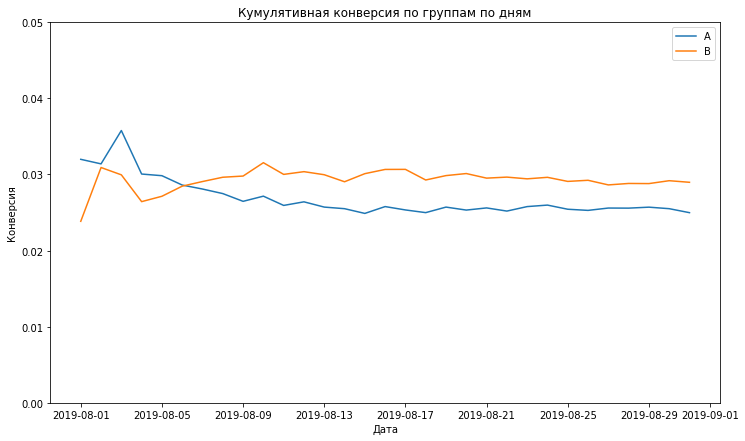

In [35]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.ylim(0, 0.05)

#### 2.2.4 Вывод
Вначале теста  куммулятивные конверсии групп сильно изменялись, а затем зафиксировались. При этом конверсия группы В зафиксировалась на более высоком значении, чем группы А.

#### 2.2.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A

Для начала смерджим  данные cumulativeDataA и cumulativeDataB.

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
                            .merge(cumulativeDataB[['date','conversion']], 
                                   left_on='date', 
                                   right_on='date', 
                                   how='left', 
                                   suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Теперь построим график.

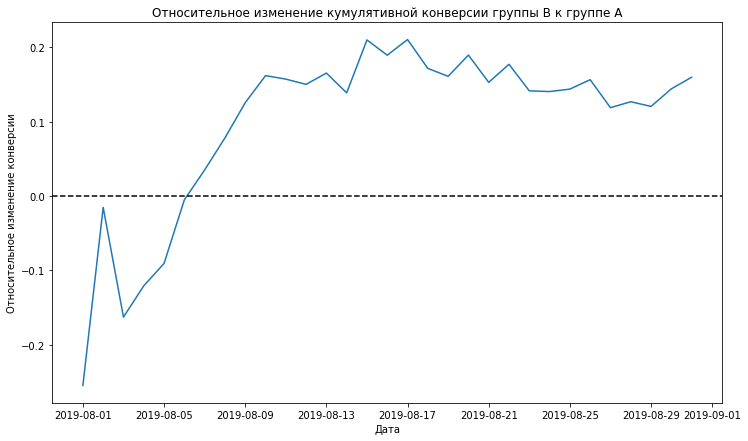

In [37]:
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

#### 2.2.5 Вывод
Вначале группа В в основном проигрывала группе А по конверсии, но потом конверсия группы В вырвалась вперед. Из графика видим, что относительное изменение конверсий еще не устаканилось и делать конкретные выводы пока преждевременно. 

#### 2.2.6 Построим точечный график количества заказов по пользователям

Посчитаем количество заказов по пользователям.

In [38]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
                    .groupby('visitorId', as_index=False)\
                    .agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


Теперь построим точечный график

Text(0, 0.5, 'Количество заказов, шт.')

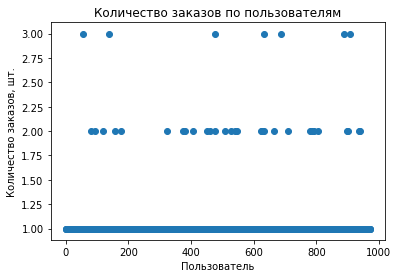

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов, шт.')

#### 2.2.6 Вывод
Из графика видим, что есть много пользователей, которые совершили 2-3 заказов. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### 2.2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [40]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

In [41]:
orders_95 = np.percentile(ordersByUsers['orders'], 95)
print('95 персентиль количества заказов по пользователям', orders_95)

95 персентиль количества заказов по пользователям 1.0


#### 2.2.7 Вывод
5% пользователей совершили два и более заказов. И 1% пользователей совершили 3 заказа. Таким образом разумно всех пользователей совершивших два и более заказов считать за выбросы.

#### 2.2.8 Построим точечный график стоимостей заказов. 

(0, 20000)

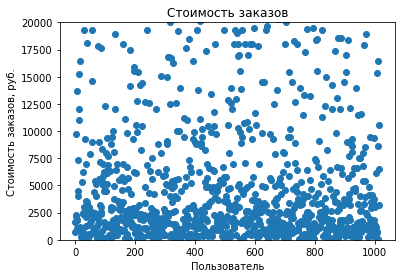

In [42]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.title('Стоимость заказов')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов, руб.')
plt.ylim(0,20000)

#### 2.2.8 Вывод
По графику за границу аномальных заказов напрашиваются все заказы более чем на 10000.

#### 2.2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

In [44]:
revenue_95 = np.percentile(orders['revenue'], 95)
print('95 персентиль выручки', revenue_95)

95 персентиль выручки 26785.0


#### 2.2.9 Вывод
5% заказов были на сумму более 26785. И 1% зказов на сумму более 53904. Таким образом разумно все заказы на сумму более 26785 считать за выбросы.

#### visitors. Подготовим данные для дальнейшего рассчета.

In [45]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Отберем из visitors данные группы А

In [46]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Рассчитаем куммулятивную сумму посетителей группы В.

In [47]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Проделаем тоже самое для группы В: Отберем из visitors данные группы В и рассчитаем куммулятивную сумму посетителей группы В.

In [48]:
# Отберем из visitors данные группы А
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Hассчитаем куммулятивную сумму посетителей группы В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#### orders. Подготовим данные для дальнейшего рассчета.

Отберем из orders данные группы А и посчитаем сколько было совершено заказов в группе А, на какую сумму в каждую дату.

In [49]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


Рассчитаем куммулятивное количество заказов и куммулятивную сумму заказов для группы А.

In [50]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Проделаем тоже самое для группы В: Отберем из orders данные группы В и посчитаем сколько было совершено заказов в группе В, на какую сумму в каждую дату; Рассчитаем куммулятивное количество заказов и куммулятивную сумму заказов для группы В.

In [51]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим полученные данные в одну таблицу.

In [52]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Прежде чем считать статистические значимости напишим функцию, которая по критерию Шапиро-Уилка будет определять имеем ли мы данные с нормальным распределением или нет.

In [53]:
def shapiro_wilk_test(colSeries, alpha = 0.05):
    
    p_value = stats.shapiro(colSeries)[1]
    
    print(f'р-значение: {p_value:.10f}')
    
    if (p_value < alpha):
        print('Отвергаем Н0: распределение не нормальное')
    
    else:
        print('Не получилось отвергнуть Н0: распределение нормальное')

#### 2.2.10 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [54]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

ordersByUsersA.head()

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменные sampleA и sampleB должны состоять из двух частей:
* Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
* Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Для этого создадим объект pd.Series нужной длины.

Список индексов создадим функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.

Последовательности объединим функцией pd.concat(). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части. axis=0 сообщает функции, что объекты Series нужно объединить по строкам (то есть записать подряд).

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],
                                axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],
                                axis=0)

In [55]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

Проверим sampleA и sampleB на нормальность критерием Шапиро-Уилка используя написанную для этого ранее функцию.

In [56]:
(shapiro_wilk_test(sampleA), shapiro_wilk_test(sampleB))

р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное
р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(None, None)

Уменьшим выборку до 4000 и повторим проверку.

In [57]:
(shapiro_wilk_test(sampleA.sample(n=4000)), shapiro_wilk_test(sampleB.sample(n=4000)))

р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное
р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное


(None, None)

Поскольку распределения не нормальные будем проверять выборки критерием Манна-Уитни. Выведем p-value и относительный прирост конверсии группы B: (конверсия группы B / конверсия группы A) - 1.

Сформулируем гипотезы для проверки:
* Н0: Различий в конверсиях группы А и В нет.
* Н1: Конверсии групп А и В различны.

In [58]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.006
0.160


#### 2.2.10 Вывод
Первое число — p-value = 0.006 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Таким образом есть статистически значимая разница конверсии группы А и группы В. Конверсия группы В на 16.0% выше чем у группы А — второе число в выводе.

#### 2.2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Для начала проверим выборки покупок (revenue) по группам на нормальность критерием Шапиро-Уилка используя написанную для этого ранее функцию.

In [59]:
(shapiro_wilk_test(orders[orders['group']=='A']['revenue']), shapiro_wilk_test(orders[orders['group']=='B']['revenue']))

р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное
р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное


(None, None)

Поскольку распределения не нормальные будем проверять выборки критерием Манна-Уитни. Выведем p-value и относительные различия в среднем чеке между группами.

Сформулируем гипотезы для проверки:

* Н0: Различий в среднем чеке группы А и В нет.
* Н1: Средние чеки группы А и В различны.

In [60]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.415
0.287


#### 2.2.11 Вывод
P-value = 0.415 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Несмотря на то, что средний чек группы B значительно выше среднего чека группы A - на 28.7% нет оснований полагать, что эта разница статистически значима. Из выше полученного графика "Относительное изменение кумулятивного среднего чека группы B к группе A" видно, что скорее всего показатель еще не устаканился.

#### 2.2.12 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Для начала найдем всех пользователей, которых мы выше определили за выбросы. А именно тех пользователей, у которых количество заказов больше orders_95, а также тех пользователей у которых стоимость заказа  больше revenue_95.

In [61]:
# Пользователи у которых количество заказов больше orders_95
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_95]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > orders_95]['visitorId']], axis = 0)

# Пользователи у которых стоимость заказа больше revenue_95
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_95]['visitorId']

# Объединение найденных пользователей
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

Подготовим очищенные выборки количества заказов по группам теста.

In [62]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                                        axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                                        axis=0)

Для начала проверим очищенные выборки конверсий sampleAFiltered и sampleBFiltered на нормальность критерием Шапиро-Уилка используя написанную для этого ранее функцию.

In [63]:
(shapiro_wilk_test(sampleAFiltered), shapiro_wilk_test(sampleBFiltered))

р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное
р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное


(None, None)

Поскольку распределения не нормальные будем проверять выборки критерием Манна-Уитни. Выведем p-value и относительный прирост конверсии группы B: (конверсия группы B / конверсия группы A) - 1.

Сформулируем гипотезы для проверки:
* Н0: Различий в конверсиях группы А и В нет.
* Н1: Конверсии групп А и В различны.

In [64]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.008
0.174


#### 2.2.12 Вывод
После очистки данных от выбросов результаты по конверсии существенно не изменились. Статистически значимая разница конверсии группы А и группы В после очистки данных сохранилась. Конверсия группы В на 17.4% выше чем у группы А — второе число в выводе.



#### 2.2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Подготовим очищенные выборки заказов по группам теста.

In [65]:
sampleAFiltered_revenue = orders[np.logical_and(orders['group']=='A',
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
                        

sampleBFiltered_revenue = orders[np.logical_and(orders['group']=='B',
                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

Проверим очищенные выборки на нормальность критерием Шапиро-Уилка используя написанную для этого ранее функцию.

In [66]:
(shapiro_wilk_test(sampleAFiltered_revenue), shapiro_wilk_test(sampleBFiltered_revenue))

р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное
р-значение: 0.0000000000
Отвергаем Н0: распределение не нормальное


(None, None)

Поскольку распределения не нормальные будем проверять выборки критерием Манна-Уитни. Выведем p-value и относительные различия в среднем чеке между группами.

Сформулируем гипотезы для проверки:

* Н0: Различий в среднем чеке группы А и В нет.
* Н1: Средние чеки группы А и В различны.

In [67]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered_revenue, sampleBFiltered_revenue)[1]))
print("{0:.3f}".format(sampleBFiltered_revenue.mean() / sampleAFiltered_revenue.mean()-1)) 

0.364
-0.034


#### 2.2.13 Вывод
P-value = 0.364 значительно больше 0.05. До очистки было 0.415. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А вот средний чек группы В после очистки данных практически сравнялся со средним чеком группы В.

### 2.2 ВЫВОДЫ

#### Факты

* Обнаружена статистически значимая разница между конверсиями группы А и группы В. По очищенным данным конверсия группы В на 16.0% выше, а по сырым на 17.4%.
* Статистически значимой разницы между средними чеками группы А и группы В нет. По сырым данным средний чек группы В выше на 28.7%, но при очистке выбросов разница в средних чеках составляет уже 3.4% (средний чек группы В на 3.4% ниже).
* График "Относительное изменение кумулятивной конверсии группы B к группе A" указывает на то, что конверсия группы В больше конверсии группы А, хотя показатель еще и не устаканился.
* График "Относительное изменение кумулятивного среднего чека группы B к группе A" указывает на то, что показатель еще не устаканился.

Исходя из обнаруженных фактов тест следует остановить и признать успешным. Конверсия группы В выше чем группы А при этом средний чек группы В не ниже.

### Вывод

* В первой части анализа была проведена приоретизация гипотез по системам ICE и RICE. По версии ICE наибольший приоритет имеет гипотеза: "Запустить акцию, дающую скидку на товар в день рождения", а по версии RICE "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

* Во второй части был проведен анализ А/В-теста, который показал, что тест следует остановить и признать успешным. Конверсия группы В выше чем группы А при этом средний чек группы В не ниже.